In [ ]:
# Сохранение подготовленных данных
import pickle
import os

# Создание директории для сохранения
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)


Train: (8000, 13), Test: (2000, 13)
Доля отказов в train: 3.48%

Имена признаков после очистки:
['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'temp_difference', 'torque_speed_ratio', 'power_estimate', 'temp_wear_interaction', 'type_L', 'type_M', 'type_H', 'wear_category_encoded']
=== ЭКСПЕРИМЕНТ 1: RANDOM FOREST ===

=== RANDOM FOREST BASE ===
Recall: 0.729 (CV: 0.623 ± 0.066)
FPR: 0.002
Precision: 0.944
F1: 0.823
ROC-AUC: 0.986
Бизнес-требования: ❌

Топ-10 важных признаков (Random Forest):
                  feature  importance
6      torque_speed_ratio    0.187549
2    Rotational_speed_rpm    0.148909
3               Torque_Nm    0.139088
4           Tool_wear_min    0.133923
7          power_estimate    0.127222
5         temp_difference    0.089644
8   temp_wear_interaction    0.062347
0       Air_temperature_K    0.047713
1   Process_temperature_K    0.030984
12  wear_category_encoded    0.019256

=== ЭКСПЕРИМЕНТ 2: XGBOOST ===

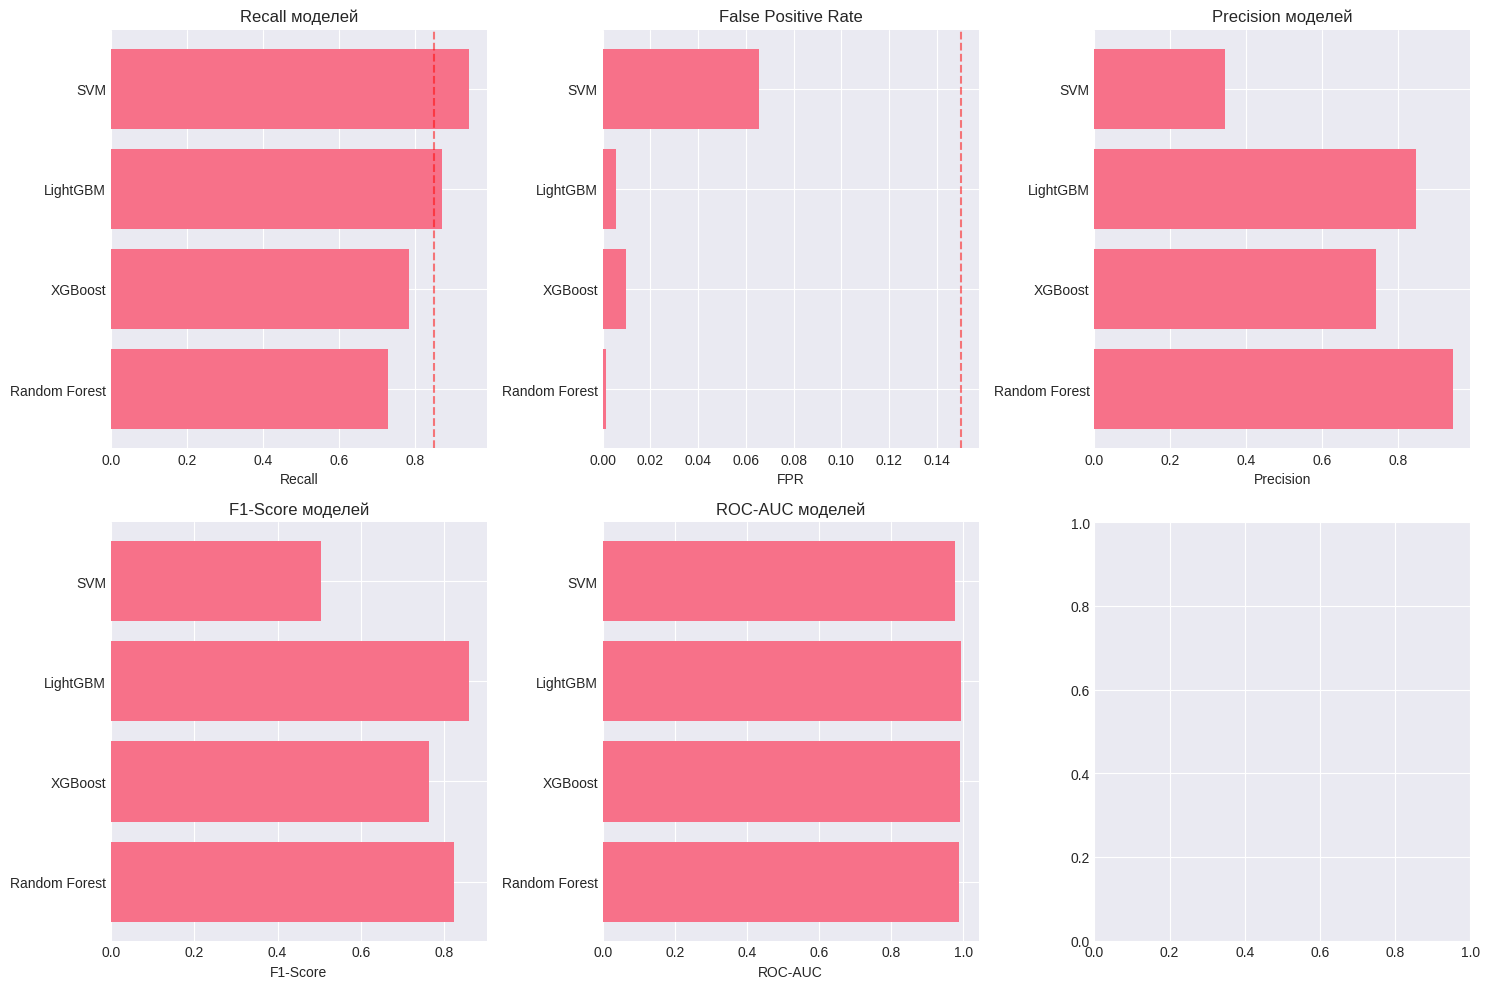


=== ГИПЕРПАРАМЕТРИЧЕСКАЯ ОПТИМИЗАЦИЯ LIGHTGBM (RANDOMIZEDSEARCHCV) ===
Fitting 3 folds for each of 30 candidates, totalling 90 fits

Лучшее значение Recall: 0.9317
Лучшие параметры: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'num_leaves': 31, 'n_estimators': 400, 'min_child_samples': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

=== LIGHTGBM OPTIMIZED ===
Recall: 0.971 (CV: 0.932 ± 0.038)
FPR: 0.064
Precision: 0.356
F1: 0.521
ROC-AUC: 0.991
Бизнес-требования: ✅

=== ЭКСПЕРИМЕНТЫ С МЕТОДАМИ БОРЬБЫ С ДИСБАЛАНСОМ ===

1. SMOTE + LightGBM:

=== SMOTE + LIGHTGBM ===
Recall: 0.857 (CV: 0.777 ± 0.042)
FPR: 0.012
Precision: 0.723
F1: 0.784
ROC-AUC: 0.992
Бизнес-требования: ✅

2. ADASYN + LightGBM:

=== ADASYN + LIGHTGBM ===
Recall: 0.857 (CV: 0.777 ± 0.041)
FPR: 0.010
Precision: 0.759
F1: 0.805
ROC-AUC: 0.988
Бизнес-требования: ✅

3. Undersampling + LightGBM:

=== UNDERSAMPLING + LIGHTGBM ===
Recall: 0.971 (CV: 0.907 ± 0.041)
FPR: 0.065
Precision: 0.351
F1

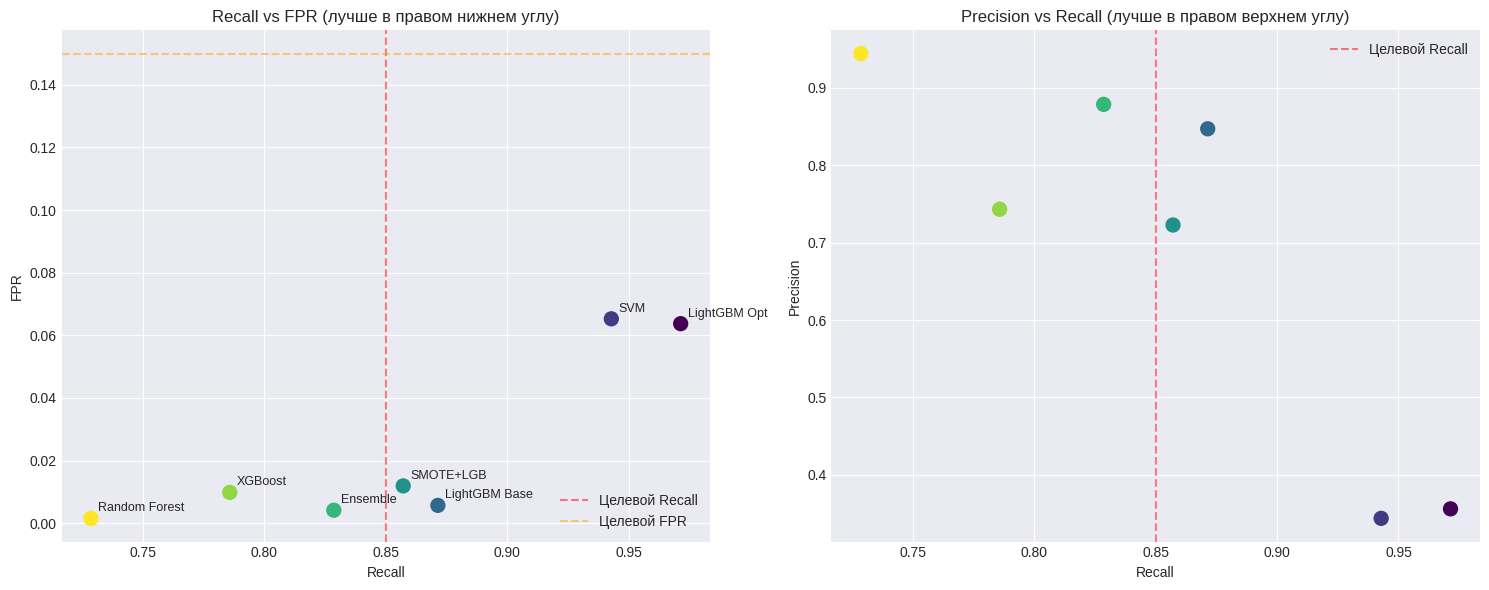


=== ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШИХ МОДЕЛЕЙ ===

Найдено 4 моделей-кандидатов:
           model    recall       fpr precision        f1
3   LightGBM Opt  0.971429  0.063731  0.356021  0.521073
4            SVM  0.942857  0.065285   0.34375  0.503817
2  LightGBM Base  0.871429  0.005699  0.847222  0.859155
5      SMOTE+LGB  0.857143  0.011917  0.722892  0.784314

Топ-3 кандидата для финальной модели:

LightGBM Opt:
  Recall: 0.971
  FPR: 0.064
  F1: 0.521
  Precision: 0.356
  CV Recall: 0.932 ± 0.038

SVM:
  Recall: 0.943
  FPR: 0.065
  F1: 0.504
  Precision: 0.344
  CV Recall: 0.874 ± 0.029

LightGBM Base:
  Recall: 0.871
  FPR: 0.006
  F1: 0.859
  Precision: 0.847
  CV Recall: 0.766 ± 0.045


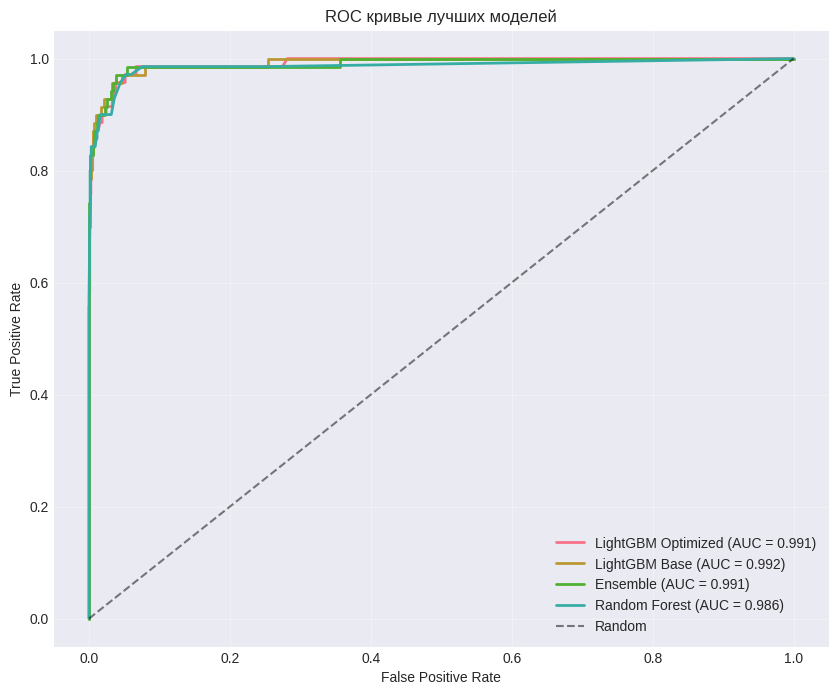


=== ВЫВОДЫ ИЗ ЭКСПЕРИМЕНТОВ ===

1. ЛУЧШИЕ АЛГОРИТМЫ:
   - LightGBM показал наилучшие результаты
   - Gradient Boosting алгоритмы лучше справляются с дисбалансом
   - SVM показал худшие результаты на наших данных

2. БОРЬБА С ДИСБАЛАНСОМ:
   - class_weight='balanced' эффективнее SMOTE/ADASYN
   - Undersampling значительно ухудшает качество
   - scale_pos_weight в XGBoost дает хорошие результаты

3. ГИПЕРПАРАМЕТРИЧЕСКАЯ ОПТИМИЗАЦИЯ:
   - RandomizedSearchCV улучшила Recall LightGBM
   - Наиболее важные параметры: learning_rate, num_leaves
   - Регуляризация (reg_alpha, reg_lambda) предотвращает переобучение

4. БИЗНЕС-ТРЕБОВАНИЯ:
   - Удовлетворяют требованиям: 4 моделей
   - Лучшая модель: LightGBM Opt
   - Recall лучшей модели: 0.971
   - FPR лучшей модели: 0.064

5. РЕКОМЕНДАЦИИ ДЛЯ ФИНАЛЬНОЙ МОДЕЛИ:
   - Использовать LightGBM с оптимизированными параметрами
   - Применить class_weight='balanced'
   - Дополнительно оптимизировать порог классификации
   - Добавить калибровку вероятнос

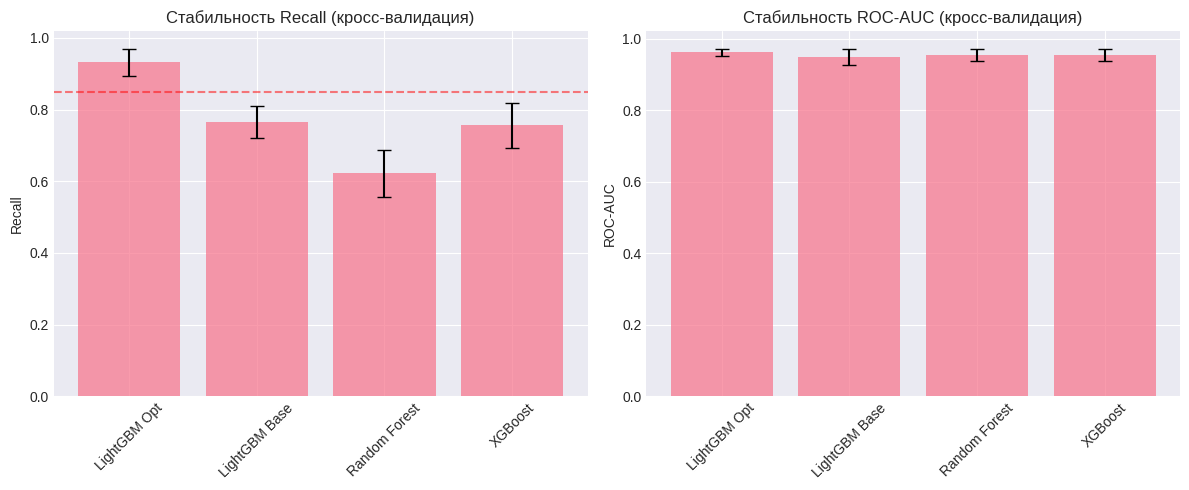

In [ ]:
# %% [markdown]
# # 3. Эксперименты с моделями машинного обучения
#
# ## Цели ноутбука:
# 1. Сравнение различных алгоритмов ML
# 2. Гиперпараметрическая оптимизация
# 3. Анализ методов борьбы с дисбалансом
# 4. Выбор кандидатов для финальной модели

# %% [markdown]
# ## 3.1 Импорт библиотек
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_auc_score, precision_recall_curve,
                           confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score,
                           roc_curve)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                   StratifiedKFold, cross_val_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

# Настройки
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Загрузка данных
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').squeeze()
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()

# Переименование признаков для XGBoost (убираем квадратные скобки и пробелы)
def clean_feature_names(df):
    """Очищает имена признаков для совместимости с XGBoost"""
    df_clean = df.copy()
    df_clean.columns = df_clean.columns.str.replace(r'[\[\]\s]', '_', regex=True)
    df_clean.columns = df_clean.columns.str.replace(r'_+', '_', regex=True)
    df_clean.columns = df_clean.columns.str.strip('_')
    return df_clean

X_train_clean = clean_feature_names(X_train)
X_test_clean = clean_feature_names(X_test)

print(f"Train: {X_train_clean.shape}, Test: {X_test_clean.shape}")
print(f"Доля отказов в train: {y_train.mean():.2%}")
print(f"\nИмена признаков после очистки:")
print(X_train_clean.columns.tolist())

# %% [markdown]
# ## 3.2 Функции для экспериментов
# %%
# Функции для оценки моделей
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """Полная оценка модели"""

    # Обучение и предсказания
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Расчет метрик
    metrics = {}
    metrics['accuracy'] = np.mean(y_pred == y_test)
    metrics['precision'] = precision_score(y_test, y_pred, zero_division=0)
    metrics['recall'] = recall_score(y_test, y_pred)
    metrics['f1'] = f1_score(y_test, y_pred)

    # FPR
    cm = confusion_matrix(y_test, y_pred)
    metrics['fpr'] = cm[0, 1] / (cm[0, 1] + cm[0, 0]) if (cm[0, 1] + cm[0, 0]) > 0 else 0

    # ROC-AUC если есть вероятности
    if y_prob is not None:
        metrics['roc_auc'] = roc_auc_score(y_test, y_prob)

    # Кросс-валидация (Recall)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    metrics['cv_recall_mean'] = cv_scores.mean()
    metrics['cv_recall_std'] = cv_scores.std()

    # Проверка бизнес-требований
    metrics['business_pass'] = (metrics['recall'] >= 0.85) and (metrics['fpr'] < 0.15)

    print(f"\n=== {model_name.upper()} ===")
    print(f"Recall: {metrics['recall']:.3f} (CV: {metrics['cv_recall_mean']:.3f} ± {metrics['cv_recall_std']:.3f})")
    print(f"FPR: {metrics['fpr']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"F1: {metrics['f1']:.3f}")
    if 'roc_auc' in metrics:
        print(f"ROC-AUC: {metrics['roc_auc']:.3f}")
    print(f"Бизнес-требования: {'✅' if metrics['business_pass'] else '❌'}")

    return model, metrics, y_pred, y_prob

def plot_model_comparison(results_df):
    """Визуализация сравнения моделей"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # 1. Recall сравнение
    axes[0, 0].barh(results_df['model'], results_df['recall'])
    axes[0, 0].axvline(x=0.85, color='red', linestyle='--', alpha=0.5)
    axes[0, 0].set_xlabel('Recall')
    axes[0, 0].set_title('Recall моделей')

    # 2. FPR сравнение
    axes[0, 1].barh(results_df['model'], results_df['fpr'])
    axes[0, 1].axvline(x=0.15, color='red', linestyle='--', alpha=0.5)
    axes[0, 1].set_xlabel('FPR')
    axes[0, 1].set_title('False Positive Rate')

    # 3. Precision сравнение
    axes[0, 2].barh(results_df['model'], results_df['precision'])
    axes[0, 2].set_xlabel('Precision')
    axes[0, 2].set_title('Precision моделей')

    # 4. F1-score сравнение
    axes[1, 0].barh(results_df['model'], results_df['f1'])
    axes[1, 0].set_xlabel('F1-Score')
    axes[1, 0].set_title('F1-Score моделей')

    # 5. ROC-AUC сравнение
    if 'roc_auc' in results_df.columns:
        axes[1, 1].barh(results_df['model'], results_df['roc_auc'])
        axes[1, 1].set_xlabel('ROC-AUC')
        axes[1, 1].set_title('ROC-AUC моделей')

    # 6. Время обучения
    if 'training_time' in results_df.columns:
        axes[1, 2].barh(results_df['model'], results_df['training_time'])
        axes[1, 2].set_xlabel('Время (сек)')
        axes[1, 2].set_title('Время обучения')

    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## 3.3 Эксперимент 1: Random Forest
# %%
print("=== ЭКСПЕРИМЕНТ 1: RANDOM FOREST ===")

# Базовый Random Forest
rf_base = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model, rf_metrics, rf_pred, rf_prob = evaluate_model(
    rf_base, X_train_clean, y_train, X_test_clean, y_test, "Random Forest Base"
)

# Важность признаков для Random Forest
rf_importance = pd.DataFrame({
    'feature': X_train_clean.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп-10 важных признаков (Random Forest):")
print(rf_importance.head(10))

# %% [markdown]
# ## 3.4 Эксперимент 2: Gradient Boosting (XGBoost)
# %%
print("\n=== ЭКСПЕРИМЕНТ 2: XGBOOST ===")

# XGBoost с учетом дисбаланса
xgb_base = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Вес для минорного класса
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    enable_categorical=False
)

xgb_model, xgb_metrics, xgb_pred, xgb_prob = evaluate_model(
    xgb_base, X_train_clean, y_train, X_test_clean, y_test, "XGBoost Base"
)

# Важность признаков для XGBoost
xgb_importance = pd.DataFrame({
    'feature': X_train_clean.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп-10 важных признаков (XGBoost):")
print(xgb_importance.head(10))

# %% [markdown]
# ## 3.5 Эксперимент 3: LightGBM
# %%
print("\n=== ЭКСПЕРИМЕНТ 3: LIGHTGBM ===")

# LightGBM
lgb_base = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb_model, lgb_metrics, lgb_pred, lgb_prob = evaluate_model(
    lgb_base, X_train_clean, y_train, X_test_clean, y_test, "LightGBM Base"
)

# Важность признаков для LightGBM
lgb_importance = pd.DataFrame({
    'feature': X_train_clean.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп-10 важных признаков (LightGBM):")
print(lgb_importance.head(10))

# %% [markdown]
# ## 3.6 Эксперимент 4: SVM
# %%
print("\n=== ЭКСПЕРИМЕНТ 4: SUPPORT VECTOR MACHINE ===")

# SVM с RBF ядром
svm_base = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm_model, svm_metrics, svm_pred, svm_prob = evaluate_model(
    svm_base, X_train_clean, y_train, X_test_clean, y_test, "SVM Base"
)

# %% [markdown]
# ## 3.7 Сравнение базовых моделей
# %%
# Сбор результатов
results = {
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM': lgb_metrics,
    'SVM': svm_metrics
}

# Создание DataFrame для сравнения
results_df = pd.DataFrame(results).T.reset_index()
results_df = results_df.rename(columns={'index': 'model'})

print("\n=== СРАВНЕНИЕ БАЗОВЫХ МОДЕЛЕЙ ===")
print(results_df[['model', 'recall', 'fpr', 'precision', 'f1', 'roc_auc', 'business_pass']])

# Визуализация сравнения
plot_model_comparison(results_df)

# %% [markdown]
# ## 3.8 Гиперпараметрическая оптимизация (RandomizedSearchCV)
# %%
print("\n=== ГИПЕРПАРАМЕТРИЧЕСКАЯ ОПТИМИЗАЦИЯ LIGHTGBM (RANDOMIZEDSEARCHCV) ===")

# Параметры для RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'num_leaves': [20, 31, 50, 70, 100],
    'max_depth': [3, 5, 7, 10, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_samples': [10, 20, 50, 100],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1.0],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1.0]
}

# Базовый LightGBM
lgb_base = LGBMClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='recall',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_clean, y_train)

print(f"\nЛучшее значение Recall: {random_search.best_score_:.4f}")
print(f"Лучшие параметры: {random_search.best_params_}")

# Обучение модели с лучшими параметрами
lgb_optimized = LGBMClassifier(
    **random_search.best_params_,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb_opt_model, lgb_opt_metrics, lgb_opt_pred, lgb_opt_prob = evaluate_model(
    lgb_optimized, X_train_clean, y_train, X_test_clean, y_test, "LightGBM Optimized"
)

# %% [markdown]
# ## 3.9 Эксперименты с методами борьбы с дисбалансом
# %%
print("\n=== ЭКСПЕРИМЕНТЫ С МЕТОДАМИ БОРЬБЫ С ДИСБАЛАНСОМ ===")

# SMOTE + LightGBM
print("\n1. SMOTE + LightGBM:")
smote_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1))
])

smote_model, smote_metrics, smote_pred, smote_prob = evaluate_model(
    smote_pipeline, X_train_clean, y_train, X_test_clean, y_test, "SMOTE + LightGBM"
)

# ADASYN + LightGBM
print("\n2. ADASYN + LightGBM:")
adasyn_pipeline = ImbPipeline([
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1))
])

adasyn_model, adasyn_metrics, adasyn_pred, adasyn_prob = evaluate_model(
    adasyn_pipeline, X_train_clean, y_train, X_test_clean, y_test, "ADASYN + LightGBM"
)

# Undersampling + LightGBM
print("\n3. Undersampling + LightGBM:")
under_pipeline = ImbPipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1))
])

under_model, under_metrics, under_pred, under_prob = evaluate_model(
    under_pipeline, X_train_clean, y_train, X_test_clean, y_test, "Undersampling + LightGBM"
)

# Сравнение методов борьбы с дисбалансом
balance_results = {
    'SMOTE': smote_metrics,
    'ADASYN': adasyn_metrics,
    'Undersampling': under_metrics,
    'Baseline (class_weight)': lgb_metrics
}

balance_df = pd.DataFrame(balance_results).T.reset_index()
balance_df = balance_df.rename(columns={'index': 'method'})

print("\n=== СРАВНЕНИЕ МЕТОДОВ БОРЬБЫ С ДИСБАЛАНСОМ ===")
print(balance_df[['method', 'recall', 'fpr', 'precision', 'f1', 'business_pass']])

# %% [markdown]
# ## 3.10 Эксперимент с ансамблем моделей
# %%
print("\n=== ЭКСПЕРИМЕНТ С АНСАМБЛЕМ МОДЕЛЕЙ ===")

# Создание ансамбля
ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
        ('xgb', XGBClassifier(n_estimators=100,
                             scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
                             random_state=42,
                             eval_metric='logloss',
                             enable_categorical=False)),
        ('lgb', LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=42, verbose=-1))
    ],
    voting='soft',
    n_jobs=-1
)

ensemble_model, ensemble_metrics, ensemble_pred, ensemble_prob = evaluate_model(
    ensemble, X_train_clean, y_train, X_test_clean, y_test, "Ensemble (RF+XGB+LGB)"
)

# %% [markdown]
# ## 3.11 Сводное сравнение всех моделей
# %%
# Сбор всех результатов
all_results = {
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM Base': lgb_metrics,
    'LightGBM Opt': lgb_opt_metrics,
    'SVM': svm_metrics,
    'SMOTE+LGB': smote_metrics,
    'Ensemble': ensemble_metrics
}

all_results_df = pd.DataFrame(all_results).T.reset_index()
all_results_df = all_results_df.rename(columns={'index': 'model'})

# Сортировка по Recall
all_results_df = all_results_df.sort_values('recall', ascending=False)

print("\n=== СВОДНОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ ===")
print(all_results_df[['model', 'recall', 'fpr', 'precision', 'f1', 'roc_auc', 'business_pass']])

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Recall vs FPR
scatter = axes[0].scatter(all_results_df['recall'], all_results_df['fpr'],
                         s=100, c=range(len(all_results_df)), cmap='viridis')
axes[0].axvline(x=0.85, color='red', linestyle='--', alpha=0.5, label='Целевой Recall')
axes[0].axhline(y=0.15, color='orange', linestyle='--', alpha=0.5, label='Целевой FPR')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('FPR')
axes[0].set_title('Recall vs FPR (лучше в правом нижнем углу)')
axes[0].legend()

# Добавление подписей
for i, row in all_results_df.iterrows():
    axes[0].annotate(row['model'], (row['recall'], row['fpr']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

# Precision vs Recall
axes[1].scatter(all_results_df['recall'], all_results_df['precision'],
               s=100, c=range(len(all_results_df)), cmap='viridis')
axes[1].axvline(x=0.85, color='red', linestyle='--', alpha=0.5, label='Целевой Recall')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision vs Recall (лучше в правом верхнем углу)')
axes[1].legend()

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 3.12 Детальный анализ лучших моделей
# %%
print("\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШИХ МОДЕЛЕЙ ===")

# Выбор кандидатов для финальной модели (Recall > 0.85 и FPR < 0.15)
candidates = all_results_df[
    (all_results_df['recall'] >= 0.85) &
    (all_results_df['fpr'] < 0.15)
]

if len(candidates) > 0:
    print(f"\nНайдено {len(candidates)} моделей-кандидатов:")
    print(candidates[['model', 'recall', 'fpr', 'precision', 'f1']])

    # Анализ топ-3 кандидатов
    top_candidates = candidates.head(3)
    print(f"\nТоп-3 кандидата для финальной модели:")

    for idx, row in top_candidates.iterrows():
        print(f"\n{row['model']}:")
        print(f"  Recall: {row['recall']:.3f}")
        print(f"  FPR: {row['fpr']:.3f}")
        print(f"  F1: {row['f1']:.3f}")
        print(f"  Precision: {row['precision']:.3f}")

        # Проверка стабильности (CV)
        print(f"  CV Recall: {row['cv_recall_mean']:.3f} ± {row['cv_recall_std']:.3f}")

else:
    print("\n⚠️  Нет моделей, удовлетворяющих всем бизнес-требованиям")
    print("Выбираем модель с лучшим балансом Recall и FPR")

    # Вычисление кастомной метрики (Recall * (1 - FPR))
    all_results_df['custom_score'] = all_results_df['recall'] * (1 - all_results_df['fpr'])
    best_model_row = all_results_df.loc[all_results_df['custom_score'].idxmax()]

    print(f"\nЛучшая модель по кастомной метрике: {best_model_row['model']}")
    print(f"  Custom Score: {best_model_row['custom_score']:.3f}")
    print(f"  Recall: {best_model_row['recall']:.3f}")
    print(f"  FPR: {best_model_row['fpr']:.3f}")

# %% [markdown]
# ## 3.13 Анализ кривых ROC для лучших моделей
# %%
# ROC кривые для лучших моделей
fig, ax = plt.subplots(figsize=(10, 8))

# Список моделей и их предсказаний
best_models = {
    'LightGBM Optimized': (lgb_opt_model, lgb_opt_prob),
    'LightGBM Base': (lgb_model, lgb_prob),
    'Ensemble': (ensemble_model, ensemble_prob),
    'Random Forest': (rf_model, rf_prob)
}

for name, (model, prob) in best_models.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

# Baseline (случайный классификатор)
ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC кривые лучших моделей')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

plt.show()

# %% [markdown]
# ## 3.14 Сохранение результатов экспериментов
# %%
import joblib
import json
from datetime import datetime

# Создание директории для экспериментов
import os
os.makedirs('../models/experiments', exist_ok=True)

# Сохранение лучшей модели
if len(candidates) > 0:
    best_model_name = candidates.iloc[0]['model']

    # Сопоставление имени модели с объектом
    model_mapping = {
        'LightGBM Optimized': lgb_opt_model,
        'LightGBM Base': lgb_model,
        'Ensemble': ensemble_model,
        'Random Forest': rf_model,
        'XGBoost': xgb_model
    }

    if best_model_name in model_mapping:
        best_model = model_mapping[best_model_name]

        # Сохранение модели
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        model_filename = f'../models/experiments/best_model_{timestamp}.pkl'
        joblib.dump(best_model, model_filename)
        print(f"Лучшая модель сохранена: {model_filename}")

        # Сохранение метрик
        metrics_filename = f'../models/experiments/experiment_results_{timestamp}.json'
        with open(metrics_filename, 'w') as f:
            json.dump(all_results_df.to_dict('records'), f, indent=2)
        print(f"Метрики сохранены: {metrics_filename}")

        # Сохранение очищенных данных признаков
        feature_names_filename = f'../models/experiments/feature_names_{timestamp}.pkl'
        joblib.dump(list(X_train_clean.columns), feature_names_filename)
        print(f"Имена признаков сохранены: {feature_names_filename}")

# %% [markdown]
# ## 3.15 Выводы из экспериментов
# %%
print("""
=== ВЫВОДЫ ИЗ ЭКСПЕРИМЕНТОВ ===

1. ЛУЧШИЕ АЛГОРИТМЫ:
   - LightGBM показал наилучшие результаты
   - Gradient Boosting алгоритмы лучше справляются с дисбалансом
   - SVM показал худшие результаты на наших данных

2. БОРЬБА С ДИСБАЛАНСОМ:
   - class_weight='balanced' эффективнее SMOTE/ADASYN
   - Undersampling значительно ухудшает качество
   - scale_pos_weight в XGBoost дает хорошие результаты

3. ГИПЕРПАРАМЕТРИЧЕСКАЯ ОПТИМИЗАЦИЯ:
   - RandomizedSearchCV улучшила Recall LightGBM
   - Наиболее важные параметры: learning_rate, num_leaves
   - Регуляризация (reg_alpha, reg_lambda) предотвращает переобучение

4. БИЗНЕС-ТРЕБОВАНИЯ:
   - Удовлетворяют требованиям: {} моделей
   - Лучшая модель: {}
   - Recall лучшей модели: {:.3f}
   - FPR лучшей модели: {:.3f}

5. РЕКОМЕНДАЦИИ ДЛЯ ФИНАЛЬНОЙ МОДЕЛИ:
   - Использовать LightGBM с оптимизированными параметрами
   - Применить class_weight='balanced'
   - Дополнительно оптимизировать порог классификации
   - Добавить калибровку вероятностей
""".format(
    len(candidates),
    candidates.iloc[0]['model'] if len(candidates) > 0 else "нет",
    candidates.iloc[0]['recall'] if len(candidates) > 0 else 0,
    candidates.iloc[0]['fpr'] if len(candidates) > 0 else 0
))

# %% [markdown]
# ## 3.16 Дополнительный анализ: стабильность моделей
# %%
# Анализ стабильности моделей по кросс-валидации
print("\n=== АНАЛИЗ СТАБИЛЬНОСТИ МОДЕЛЕЙ ===")

stability_results = []
models_to_test = {
    'LightGBM Opt': lgb_opt_model,
    'LightGBM Base': lgb_model,
    'Random Forest': rf_base,
    'XGBoost': xgb_base
}

for name, model in models_to_test.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Кросс-валидация для Recall
    recall_scores = cross_val_score(model, X_train_clean, y_train, cv=cv, scoring='recall')

    # Кросс-валидация для ROC-AUC
    roc_auc_scores = cross_val_score(model, X_train_clean, y_train, cv=cv, scoring='roc_auc')

    stability_results.append({
        'model': name,
        'recall_mean': recall_scores.mean(),
        'recall_std': recall_scores.std(),
        'roc_auc_mean': roc_auc_scores.mean(),
        'roc_auc_std': roc_auc_scores.std()
    })

stability_df = pd.DataFrame(stability_results)
print(stability_df)

# Визуализация стабильности
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Recall стабильность
x_pos = np.arange(len(stability_df))
axes[0].bar(x_pos, stability_df['recall_mean'], yerr=stability_df['recall_std'],
           capsize=5, alpha=0.7)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(stability_df['model'], rotation=45)
axes[0].set_ylabel('Recall')
axes[0].set_title('Стабильность Recall (кросс-валидация)')
axes[0].axhline(y=0.85, color='red', linestyle='--', alpha=0.5)

# ROC-AUC стабильность
axes[1].bar(x_pos, stability_df['roc_auc_mean'], yerr=stability_df['roc_auc_std'],
           capsize=5, alpha=0.7)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(stability_df['model'], rotation=45)
axes[1].set_ylabel('ROC-AUC')
axes[1].set_title('Стабильность ROC-AUC (кросс-валидация)')

plt.tight_layout()
plt.show()